# Example 2#

Tuning the hyper-parameters of LS-SVM regression models using the scikit-learn GridsearchCV function.
The synthetic data used for this purpose is the 1D Sinc function.

In [1]:
#Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, KFold

from LSSVMRegression import LSSVMRegression

In [2]:
#Generating the synthetic data
x=np.array([np.random.uniform(low=-5,high=5,size=10)]).T
#array([[0,1,2,3]]).T  #create a column vector of 1 feature, 4 samples
y=np.sinc(x).ravel()  #create the associated targets, needs to be a 1D array
ndata=x.shape[0]           #keep track of the number of rows

#print("x=",x,",\nx-dim=",x.ndim)
#print("y=",y,"\ny-dim=",y.ndim)

In [5]:
#rbf-model
clfrbf=LSSVMRegression(
        gamma=100,       #set the gamma-hyper parameter equal to 1
        kernel='poly', #use the linear kernel
        sigma=1.0,
        c=1.0,
        d=3,
            )
clfrbf.fit(x,y) # train our model, aka solve the set of linear equations
print("b = ",clfrbf.intercept_)
print("a_i = ",clfrbf.coef_)


b =  0.17485577799125174
a_i =  [-22.09016169  -0.76341329   1.13228032  -4.10489764 -17.72051932
  -0.18436783  10.95685409  24.83839831  -4.15379     12.08961704]


Yexact= [3.89817183e-17 1.00095984e-03 2.00367839e-03 ... 2.00367839e-03
 1.00095984e-03 3.89817183e-17]
Ypred= [-1.02610416 -1.02268176 -1.01926538 ...  0.05552924  0.05631215
  0.05709843]
Mean squared error: 0.14
Coefficient of determination: -0.60


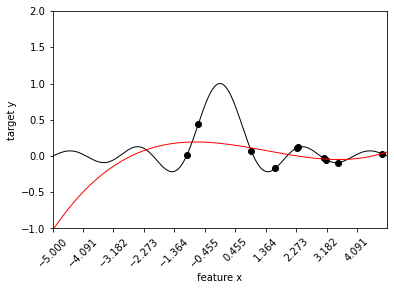

In [6]:
#generate a dens mesh
xmin=-5
xmax=5
xPred=np.linspace((xmin,),(xmax,),2001)
yExact=np.sinc(xPred).ravel()
# and predict
yPred=clfrbf.predict(xPred)

print("Yexact=",yExact)
print("Ypred=",yPred)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yExact, yPred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yExact, yPred))
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(xPred, yExact,  color='black',linewidth=1)
plt.plot(xPred, yPred,   color='red'  ,linewidth=1)

plt.axis([xmin,xmax,-1,2])
step=(xmax-xmin)/11.0
Xlst=list()
for a in np.arange(xmin,xmax,step):
    Xlst.append(a)
plt.xticks(Xlst,rotation=45)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.yticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.xlabel("feature x")
plt.ylabel("target y")

plt.show()

In [7]:
#sklearn gridsearch
params=dict()
Gamma=[1.0e-6,1.0e-5,1.0e-4,1.0e-3,1.0e-2,0.1,1.0,10.0,100.0,1.0e3,1.0e4,1.0e5,1.0e6]
params['gamma']=Gamma
CrossVal=LeaveOneOut()
CVmodel = GridSearchCV(
                clfrbf, # our estimator
                param_grid=params, # dictionary with our possible hyper-parameters
                scoring='neg_mean_squared_error', #This gives the same type of scoring as the lasso CV
                n_jobs=4,
                cv=CrossVal,
                error_score=np.nan, # if set to raise it throws a error in case one point dies, now it throws a warning "FitFailedWarning"
                return_train_score=True, # why would we not be interested in the result of the training scores?
                )
CVmodel.fit(x,y)        

scoreY1 = CVmodel.cv_results_['mean_test_score']*-1.0
scoreX1 = CVmodel.cv_results_['param_gamma']
print("score:",scoreX1)
print("score:",scoreY1)

#dens grid
params=dict()
Factors=np.array([1,2,3,4,5,6,7,8,9])
GammaDens=list()
for g in Gamma:
    GammaDens.extend(Factors*g)
    
params['gamma']=GammaDens
CVmodel = GridSearchCV(
                clfrbf, # our estimator
                param_grid=params, # dictionary with our possible hyper-parameters
                scoring='neg_mean_squared_error', #This gives the same type of scoring as the lasso CV
                n_jobs=4,
                cv=CrossVal,
                error_score=np.nan, # if set to raise it throws a error in case one point dies, now it throws a warning "FitFailedWarning"
                return_train_score=True, # why would we not be interested in the result of the training scores?
                )
CVmodel.fit(x,y)        
scoreY2 = CVmodel.cv_results_['mean_test_score']*-1.0
scoreX2 = CVmodel.cv_results_['param_gamma']



score: [1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 100.0 1000.0 10000.0 100000.0
 1000000.0]
score: [0.03063832 0.03064659 0.03154811 0.04097839 0.04386182 0.03874566
 0.05306456 0.06109317 0.06221904 0.0623361  0.06234786 0.06234903
 0.0623492 ]


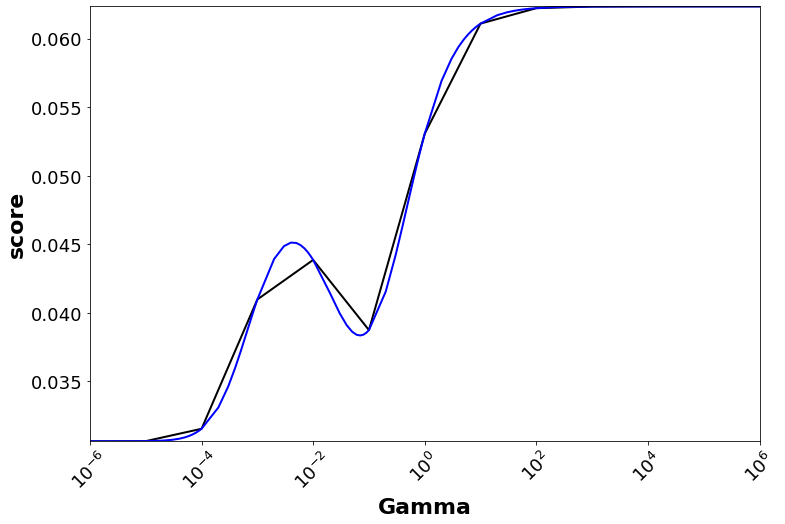

In [8]:
#generate a dens mesh
xmin=1e-6
xmax=1e+6
ymin=np.min(scoreY2)
ymax=np.max(scoreY2)

plt.figure(figsize=(12,8))

plt.plot(scoreX1, scoreY1,  color='black',linewidth=2)
plt.plot(scoreX2, scoreY2,  color='blue',linewidth=2)

plt.xscale("log")
plt.axis([xmin,xmax,ymin,ymax])
plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.xlabel("Gamma",fontsize=22,fontweight="bold")
plt.ylabel("score",fontsize=22,fontweight="bold")

plt.show()